In [1]:
#Importing multiple library to read,analysed and visualized the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#Loading the dataset
Iris_data = pd.read_csv("C:/Users/Admin/OneDrive - Strathmore University/school work/STRATHMORE UNIVERSITY(BBIT)/BBIT EXEMPT 3.2/Artificial Intelligencence (AI)/project/Decision Tree/iris.csv")

In [3]:
#Checking top 10 records of Dataset..
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Basic Information regarding data
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Data points count value for each class labels..
Iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

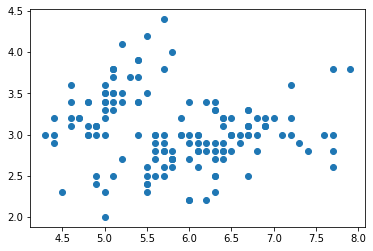

In [6]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

In [7]:
# Building Classification Model
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
#separating dependent and independent variables
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = Iris_data[feature_columns].values
y = Iris_data['Species'].values

In [9]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

[Text(0.375, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.25, 0.6428571428571429, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.6428571428571429, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.625, 0.5, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.35714285714285715, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.625, 0.21428571428571427, 'X[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamp

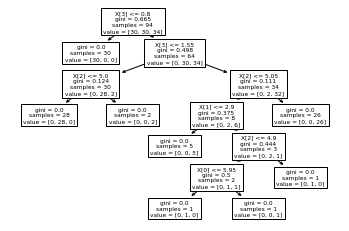

In [11]:
#Creating the decsion tree
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(Iris_clf)

In [12]:
#Visualizing Decision Tree using graphviz library
#dot_data = tree.export_graphviz(Iris_clf, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

In [13]:
#Accuracy
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [14]:
#Checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Iris_clf.predict(Xcv)

In [15]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [16]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [17]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 2, 11]],

       [[30,  2],
        [ 0, 13]]], dtype=int64)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

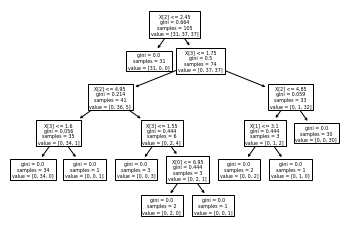

In [18]:
#Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)
#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

In [19]:
#Final Decision tree build for deploying in real world cases....
#dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

In [20]:
#Checking the performance of model on Actual Test data...
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

In [21]:
#Testing for New points except from Dataset
#Test_point = [[5.4,3.0,4.5,1.5],
             #[6.5,2.8,4.6,1.5],
             #[5.1,2.5,3.0,1.1,-0.5,1.4],
             #[5.1,3.3,1.7,0.5,1.6,2.8]]
#print(Iris_Fclf.predict(Test_point))